In [35]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Let’s run the basic SIR model

In [36]:
# describe the model
def deriv(y, t, N, beta, k, delta, alpha, rho):
    S, E, I, R, D= y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - k * E
    dIdt = delta * E - (1 - alpha) * k * I - alpha * rho * I
    dRdt = (1 - alpha) * k * I
    dDdt = alpha * rho * I #D(t) is the dead w.r.t. time
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [37]:
# describe the parameters
N =  10_000_000
beta = 2.5
alpha = 0.02
rho = 1/12
delta = 1/5
k=1/7                   
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one infected, rest susceptible

In [38]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta, alpha, rho))
S, E, I, R, D = ret.T

In [39]:
def plotsir(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'c', alpha=0.7, linewidth=2, label='Dead')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Number of people')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();

plot the graph

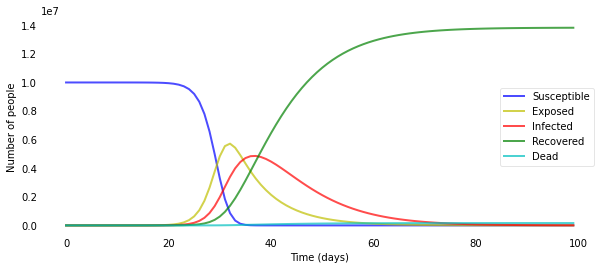

In [40]:
plotsir(t, S, E, I, R, D)